## Project: German Credit Risk Prediction -  Analyzing Credit Risk Trends and Implications
##### - by Ifeoma Augusta Adigwe


## Introduction:
- This dataset was gotten from www.kaggle.com

The "German Credit Risk Prediction" project is a comprehensive analysis endeavor aimed at understanding and predicting credit risk in the German financial landscape. This project hinges on a dataset that encompasses a range of variables, including age, sex, job, housing, savings accounts, checking accounts, credit amount, duration, purpose, and risk.

Over the years, the credit risk landscape in Germany has faced several challenges. Economic recessions, fluctuating interest rates, and global financial crises have all played a significant role in shaping the credit risk environment. Additionally, demographic shifts, changes in employment patterns, and evolving customer preferences have influenced how financial institutions assess and manage credit risk.

## Dataset Description:

- Age: This column represents the age of the credit applicant. 
- Sex: Indicates the gender of the applicant, typically categorized as male or female.
- Job: Describes the job type or occupation of the applicant. It provides insights into the employment status and stability 
- Housing: Specifies the type of housing the applicant resides in, which could be categorized as owned, rented, or free.
- Saving accounts:contains information about the applicant's savings account status
- Checking account: contain details about the applicant's checking account, including the balance or account type.
- Credit amount: Represents the amount of credit requested by the applicant. 
- Duration: Indicates the duration for which the credit is requested. 
- Purpose: Describes the purpose for which the credit is sought. 
- Risk: This is the target variable to be predicted. It represents the credit risk and categorized as "good" or "bad" credit risk

Analyzing this dataset can help assess the factors that contribute to credit risk and build predictive models to make informed lending decisions.

### Stakeholders expectations:

The "German Credit Risk Prediction" project is not only an essential exercise for the financial industry but also a reflection of how data-driven analysis can help shape economic stability and growth. 

By understanding the challenges, the factors influencing credit risk, and the benefits to stakeholders, this analysis serves as a valuable tool in optimizing lending practices and maintaining the financial health of Germany.

In [1]:
# Import all necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# import the dataset

df = pd.read_csv(r'C:\Users\IfeomaAugustaAdigwe\Desktop\DATASETS Pool\german_credit_data.csv')
df.head(5)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
df.tail(5)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,999,27,male,2,own,moderate,moderate,4576,45,car,good


In [4]:
print(df.shape)

(1000, 11)


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [8]:
df.describe(include = 'all')

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,499.500000,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,288.819436,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,0.000000,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,249.750000,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,499.500000,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,749.250000,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


In [9]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [10]:
df.max()

Unnamed: 0                   999
Age                           75
Sex                         male
Job                            3
Housing                     rent
Credit amount              18424
Duration                      72
Purpose          vacation/others
Risk                        good
dtype: object

In [11]:
# To check the unique values in a specific column

print(df['Purpose'].unique())

['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


# Data Cleaning!!!

In [12]:
# Drop irrelevant columns

df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [13]:
## Saving accounts & Credit amount columns have null values. Fill missing values using fillna(0)

def clean_data(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            df[column].fillna(df[column].mean(), inplace=True)
    
    df.drop_duplicates(inplace=True)
    return df

cleaned_data = clean_data(df)
#cleaned_data

In [14]:
### Another method Fill missing values using fillna(0)

#df['Saving accounts'].fillna(df['Saving accounts'].mode()[0], inplace = True)
#df['Checking account'].fillna(df['Checking account'].mode()[0], inplace = True)

In [15]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

# Exploratory Data Analysis!!!

## Univariate Analysis

### Analyze the distribution of ages to understand the age groups that are more likely to apply for credit.

In [16]:
# Check the Age Distribution

ages = df['Age']
ages

0      67
1      22
2      49
3      45
4      53
       ..
995    31
996    40
997    38
998    23
999    27
Name: Age, Length: 1000, dtype: int64

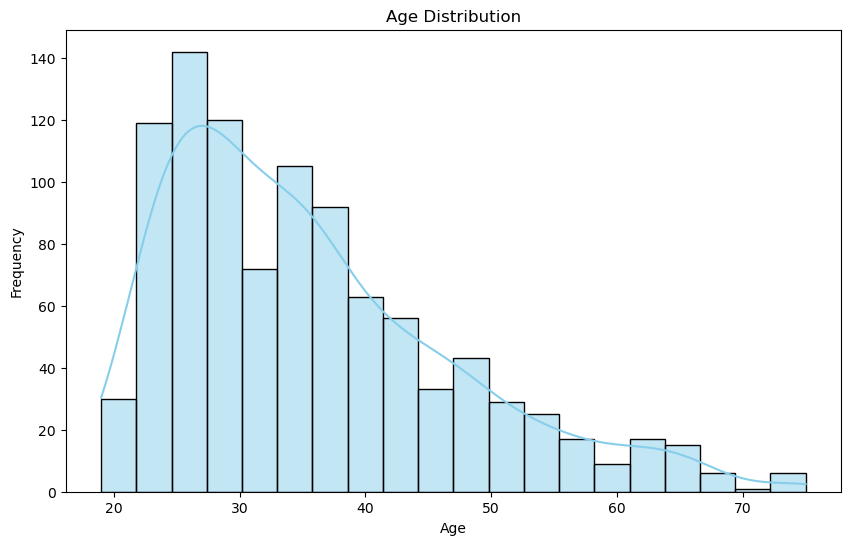

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(ages, bins=20, kde=True, color='skyblue', edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

- It is observed that most applicants are between the ages of 21 - 44 years old

In [18]:
# Create age_group and value_count the number of credit applicants in the dataset

age_bins = [18, 24, 34, 44, 54, 64, 74, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']

df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)# Add a new column- age_group
age_group_counts = df['Age Group'].value_counts()
age_group_counts

25-34    399
35-44    251
18-24    149
45-54    122
55-64     56
65-74     21
75+        2
Name: Age Group, dtype: int64

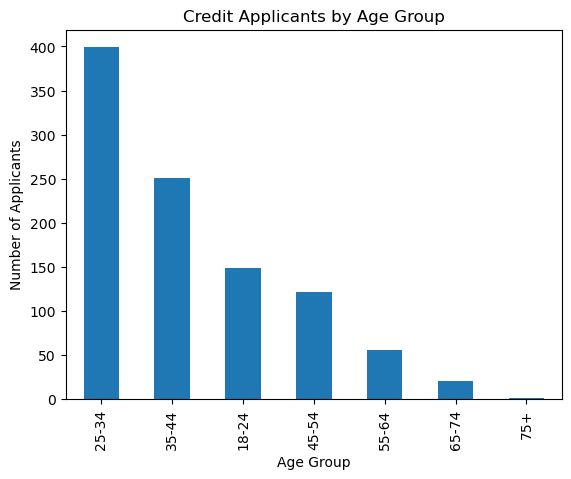

In [19]:
# plot a bar plot

age_group_counts.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Number of Applicants')
plt.title('Credit Applicants by Age Group')
plt.show()

- The most likely age-group to apply for credit is between 25 - 34 years old, followed by 35 - 44 years old

In [20]:
# Lists of categorical columns

cols = df.select_dtypes('object').columns
categorical_cols = cols.tolist()
categorical_cols

['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

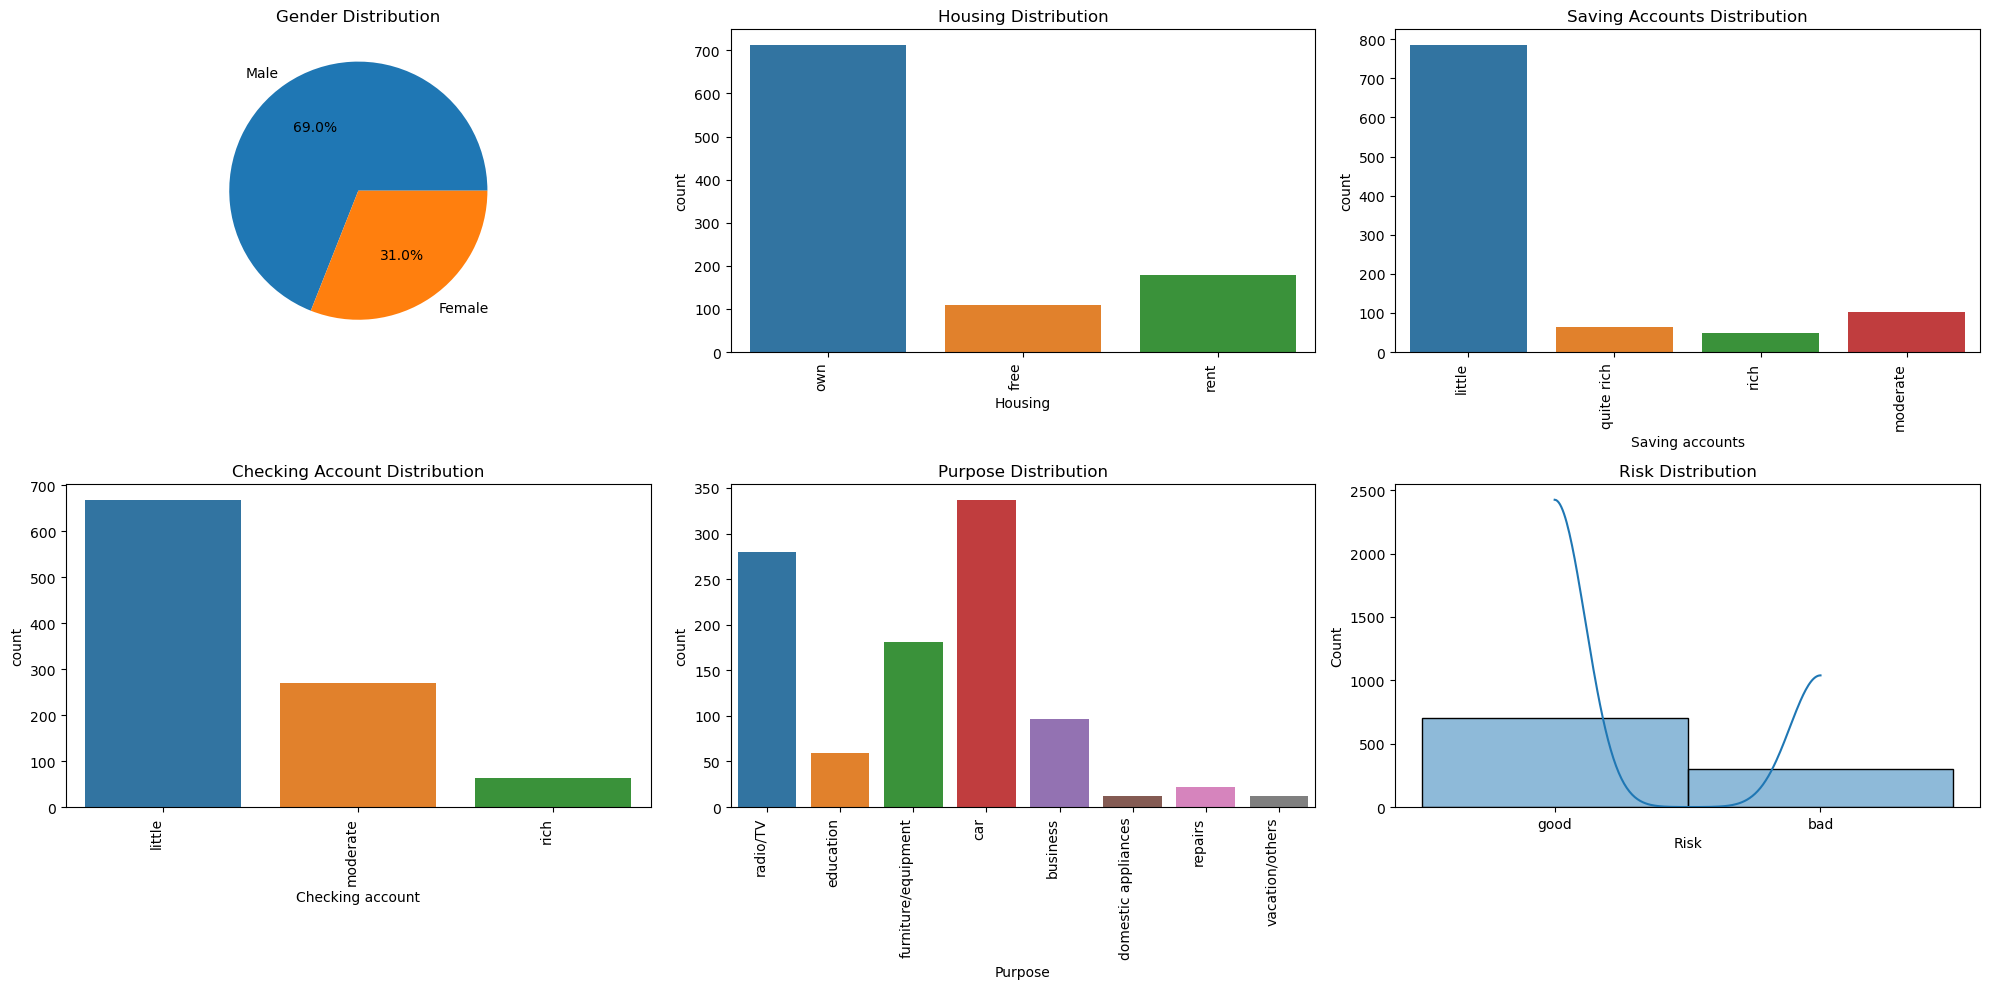

In [21]:
## Plot a Subplot to display all categorical columns with different graph types

fig, ax = plt.subplots(2, 3, figsize=(20, 10)) ## 2rows & 3columns(subplots)

ax[0, 0].pie(df['Sex'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%') # (Pie Chart)
ax[0, 0].set_title('Gender Distribution')

sns.countplot(x='Housing', data=df, ax=ax[0, 1]) ##(Count Plot)
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=90, ha='right')
ax[0, 1].set_title('Housing Distribution')

sns.countplot(x='Saving accounts', data=df, ax=ax[0, 2]) ##(Count Plot)
ax[0, 2].set_xticklabels(ax[0, 2].get_xticklabels(), rotation=90, ha='right')
ax[0, 2].set_title('Saving Accounts Distribution')

sns.countplot(x='Checking account', data=df, ax=ax[1, 0]) ##(Count Plot)
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=90, ha='right')
ax[1, 0].set_title('Checking Account Distribution')

sns.countplot(x='Purpose', data=df, ax=ax[1, 1]) ##(Count Plot)
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=90, ha='right')
ax[1, 1].set_title('Purpose Distribution')

sns.histplot(x='Risk', data=df, ax=ax[1, 2], kde=True) ## (Histogram with KDE)
ax[1, 2].set_title('Risk Distribution')

plt.tight_layout()
plt.show()

#### Insights:
- The gender distribution shows a male predominance in the dataset
- Significant proportion of loan applicants own their own houses
- Most applicants exhibit relatively modest account balances. 
- Car loans emerge as the most prominent category among the loan types
- The majority of loans fall into the low-risk category

In [22]:
# Lists of numerical columns

nums = df.select_dtypes('int64').columns
numeric_cols = nums.tolist()
numeric_cols

['Age', 'Job', 'Credit amount', 'Duration']

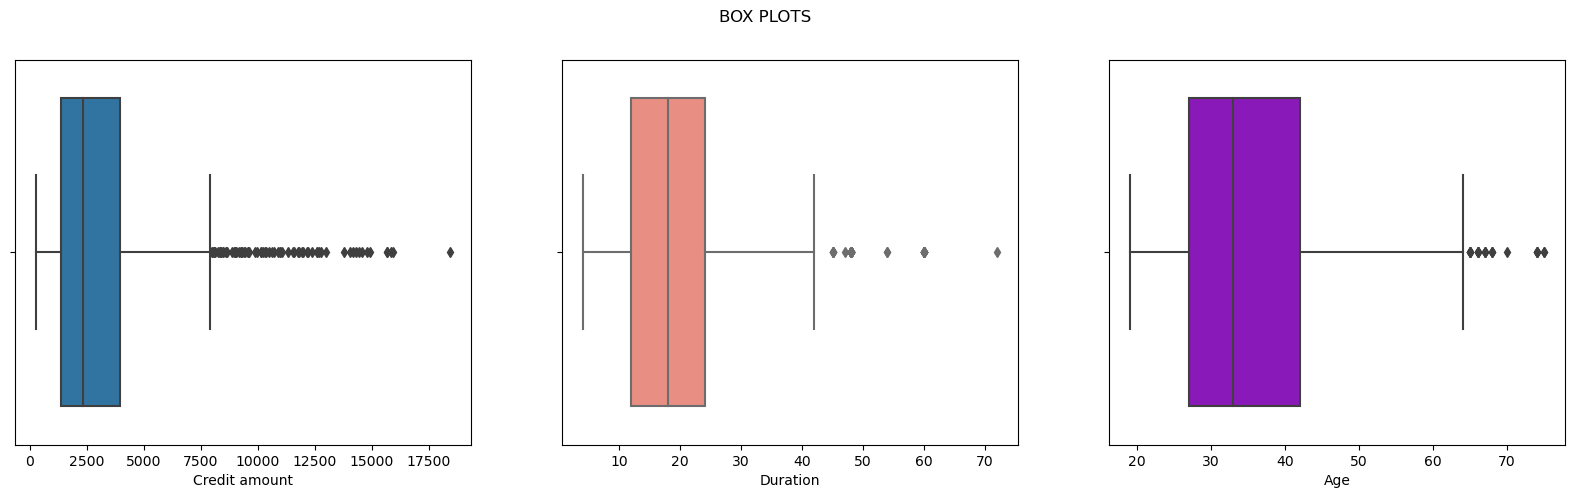

In [23]:
## Distribution Plots and Box Plots

fig, ax = plt.subplots(1,3, figsize=(20,5))
plt.suptitle('BOX PLOTS')
sns.boxplot(x=df['Credit amount'], ax=ax[0]);
sns.boxplot(x=df['Duration'], ax=ax[1], color='salmon');
sns.boxplot(x=df['Age'], ax=ax[2], color='darkviolet' );


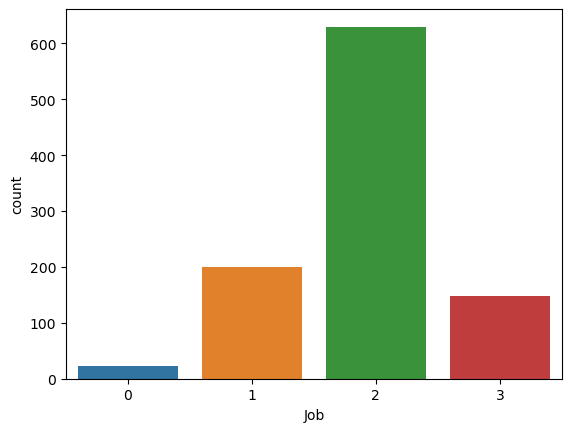

In [24]:
sns.countplot(x='Job', data=df)
plt.show()

## Insights:
- People around the ages of 26 - 42 apply for loans more
- Most loan amount is around 2100 - 4200
- Average loan duration is averagely between 12-24 months
- Most people have 2 jobs and they receive most loan facilities


## Bi-Variate Analysis

### Which Gender is considered to have more Credit Risk?

In [25]:
# Extract the 'Sex' and 'Risk' columns
gender = df['Sex']
credit_risk = df['Risk']

# Group data by gender and risk
gender_credit_distribution = df.groupby(['Sex', 'Risk']).size().unstack().fillna(0)
gender_credit_distribution

Risk,bad,good
Sex,,
female,109,201
male,191,499


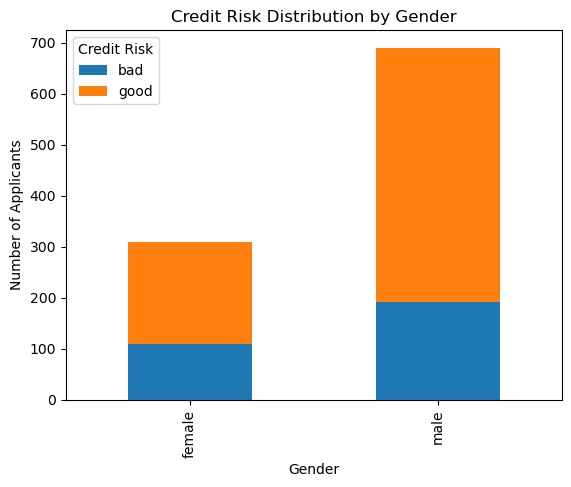

In [26]:
gender_credit_distribution.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Number of Applicants')
plt.title('Credit Risk Distribution by Gender')
plt.legend(title='Credit Risk')
plt.show()

- The Male gender have tendercy to have higher credit risk

### What is the impact of the type of job on credit risk?

In [27]:
# Group data by both 'Risk' and 'Job'
job_credit_grouped = df.groupby(['Risk', 'Job']).size().reset_index(name='Count')
job_credit_grouped

,Risk,Job,Count
0,bad,0,7
1,bad,1,56
2,bad,2,186
3,bad,3,51
4,good,0,15
5,good,1,144
6,good,2,444
7,good,3,97


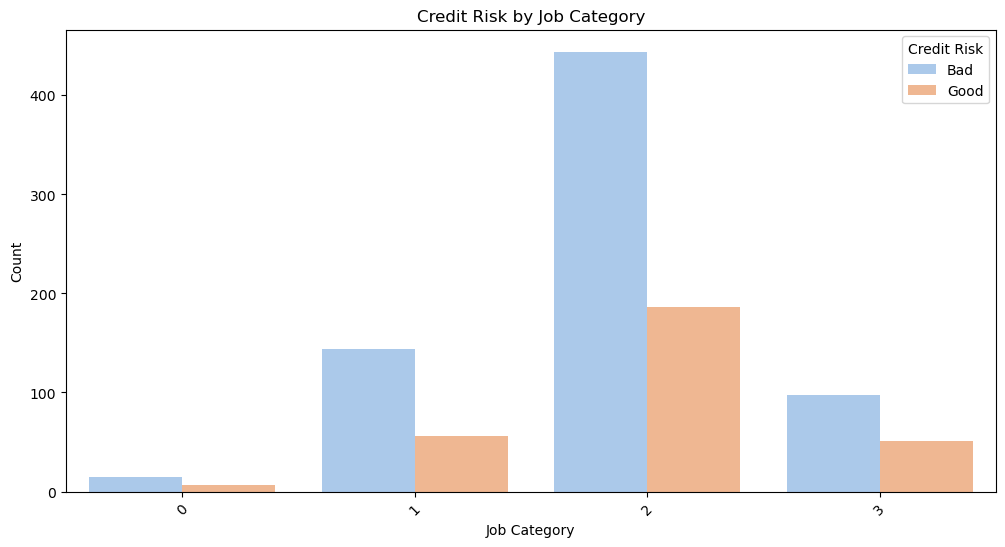

In [28]:
plt.figure(figsize=(12, 6))
sns.set_palette("pastel")  # Set a palette for better color differentiation
sns.countplot(data=df, x='Job', hue='Risk')
plt.title('Credit Risk by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='Credit Risk', loc='upper right', labels=['Bad', 'Good'])
plt.show()

- Job category could mean the number of jobs people have. The applicants with two jobs have higher credit risk followed by applicants with one job.

### Analyze the balances in savings accounts and checking accounts. 

In [29]:
# correlate savings and checking accounts with credit risk levels

account_data = df[['Saving accounts', 'Checking account', 'Risk']]
account_balance_distribution = account_data.groupby(['Saving accounts', 'Checking account', 'Risk']).size().unstack(fill_value=0)
account_balance_distribution

Risk                              bad  good
Saving accounts Checking account           
little          little            163   375
                moderate           74   123
                rich               12    39
moderate        little              9    42
                moderate           24    23
                rich                1     4
quite rich      little              7    41
                moderate            3     8
                rich                1     3
rich            little              2    29
                moderate            4    10
                rich                0     3

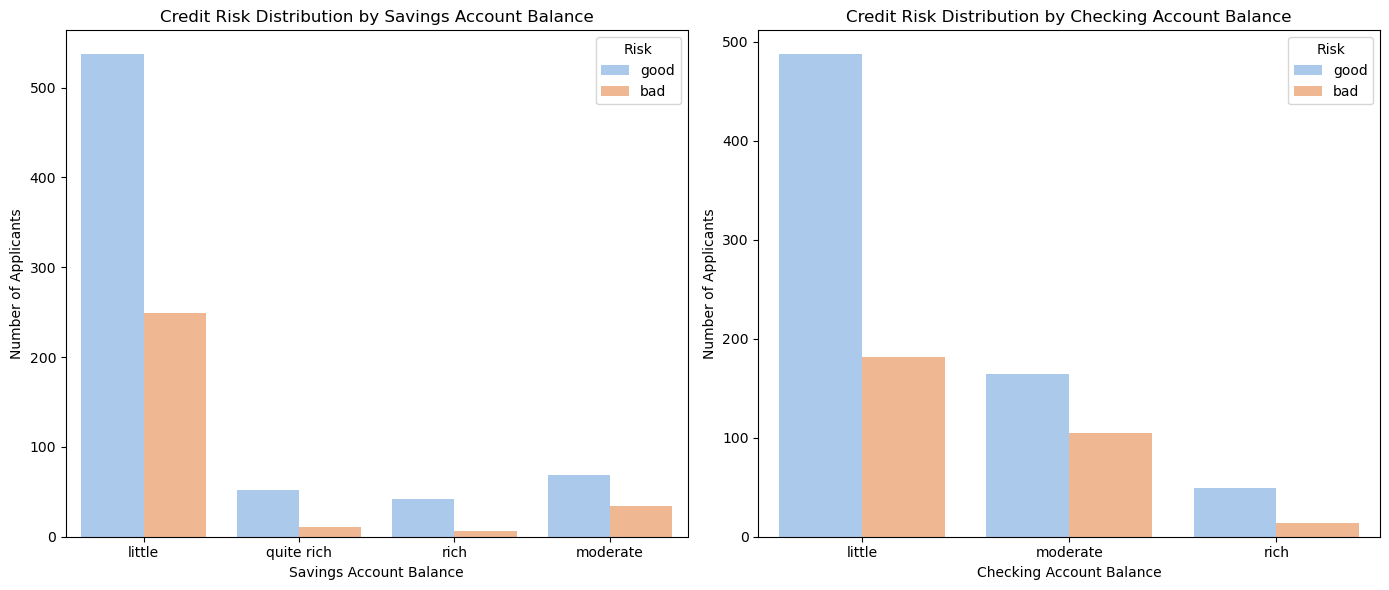

In [30]:
account_data = df[['Saving accounts', 'Checking account', 'Risk']]

plt.figure(figsize=(14, 6))# Create subplots

#  Savings Account
plt.subplot(1, 2, 1)
sns.countplot(data=account_data, x='Saving accounts', hue='Risk', palette='pastel')
plt.xlabel('Savings Account Balance')
plt.ylabel('Number of Applicants')
plt.title('Credit Risk Distribution by Savings Account Balance')

#  Checking Account
plt.subplot(1, 2, 2)
sns.countplot(data=account_data, x='Checking account', hue='Risk', palette='pastel')
plt.xlabel('Checking Account Balance')
plt.ylabel('Number of Applicants')
plt.title('Credit Risk Distribution by Checking Account Balance')

plt.tight_layout()
plt.show()

- Applicants with little savings and checking balance have more tendency to have higher credit risk, followed by moderate.
- Based on this dataset, it is obvious that the rich have very little credit risk

### Is certain loan purposes riskier than others -  (e.g. car, education, vacation, business, etc)

In [31]:
purpose_data = df[['Purpose', 'Risk']]
purpose_data 

,Purpose,Risk
0,radio/TV,good
1,radio/TV,bad
2,education,good
3,furniture/equipment,good
4,car,bad
...,...,...
995,furniture/equipment,good
996,car,good
997,radio/TV,good
998,radio/TV,bad


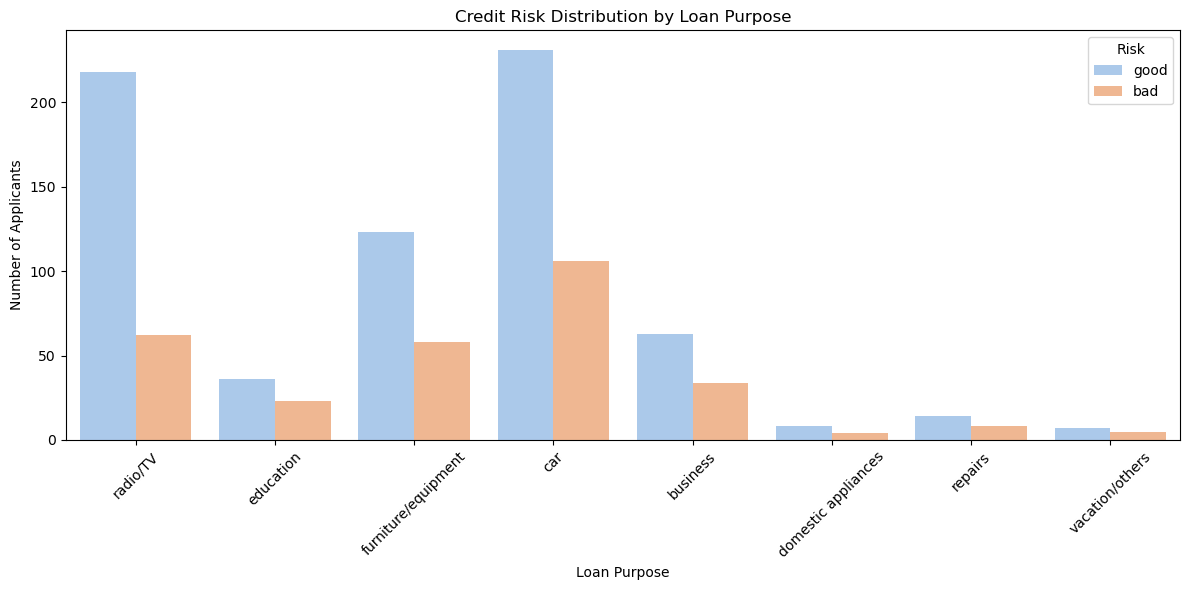

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(data=purpose_data, x='Purpose', hue='Risk', palette='pastel')
plt.xlabel('Loan Purpose')
plt.ylabel('Number of Applicants')
plt.title('Credit Risk Distribution by Loan Purpose')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

- The most common loan purpose is Car, followed by radio/TV

### Is the housing status of applicants a factor affecting credit risk??

In [33]:
housing = df['Housing']
credit_risk = df['Risk']
data = pd.DataFrame({'Housing': housing, 'Risk': credit_risk})
data

,Housing,Risk
0,own,good
1,own,bad
2,own,good
3,free,good
4,free,bad
...,...,...
995,own,good
996,own,good
997,own,good
998,free,bad


In [34]:
# To check the unique values in a specific column

print(df['Risk'].unique())

['good' 'bad']


Housing    0
Risk       0
dtype: int64


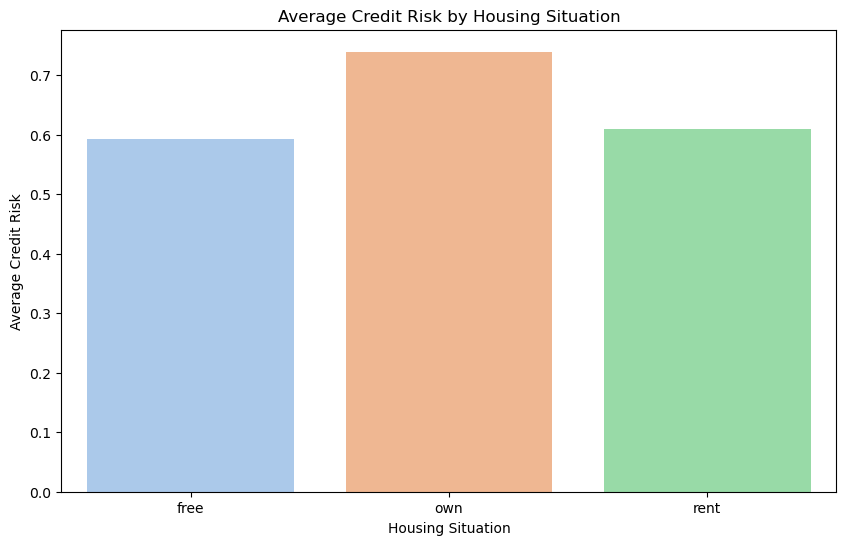

In [35]:

risk_mapping = {'good': 1, 'bad': 0}
df['Risk'] = df['Risk'].map(risk_mapping)
data = pd.DataFrame({'Housing': df['Housing'], 'Risk': df['Risk']})

print(data.isnull().sum())# Check for missing values

housing_credit_mean = data.groupby('Housing')['Risk'].mean().reset_index()# Group data by housing situation

plt.figure(figsize=(10, 6))
sns.barplot(data=housing_credit_mean, x='Housing', y='Risk', palette='pastel')
plt.xlabel('Housing Situation')
plt.ylabel('Average Credit Risk')
plt.title('Average Credit Risk by Housing Situation')
plt.show()

- Applicants with their own houses have higher credit risk

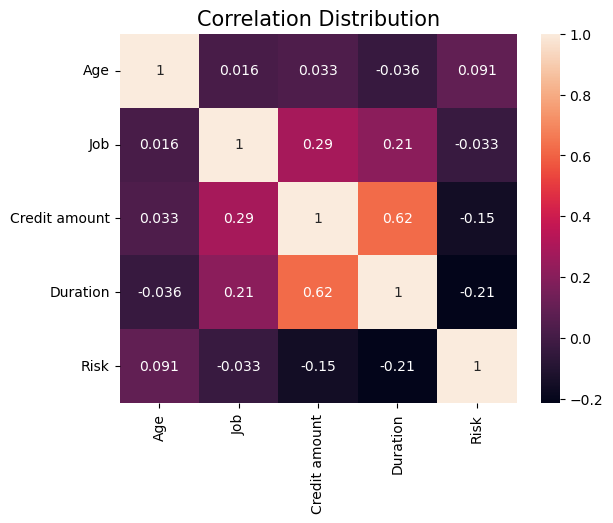

In [36]:
data_correlation = df.corr()
sns.heatmap(data_correlation, annot=True).set_title("Correlation Distribution",fontsize=15);
plt.show()

- There is a correlation between Credit amount and Duration

# Data Prepocessing!!

In [37]:
df = pd.read_csv(r'C:\Users\IfeomaAugustaAdigwe\Desktop\DATASETS Pool\german_credit_data.csv')
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


## Convert all Categorical columns using One-Hot encoding 

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

In [39]:
# Define categorical columns to be one-hot encoded

categorical_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)# Perform one-hot encoding
df_encoded

,Unnamed: 0,Age,Job,Credit amount,Duration,Risk,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,...,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0,67,2,1169,6,good,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,22,2,5951,48,bad,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,2,49,1,2096,12,good,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,45,2,7882,42,good,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,53,2,4870,24,bad,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,1,1736,12,good,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
996,996,40,3,3857,30,good,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
997,997,38,2,804,12,good,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
998,998,23,2,1845,45,bad,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   1000 non-null   int64 
 1   Age                          1000 non-null   int64 
 2   Job                          1000 non-null   int64 
 3   Credit amount                1000 non-null   int64 
 4   Duration                     1000 non-null   int64 
 5   Risk                         1000 non-null   object
 6   Sex_male                     1000 non-null   uint8 
 7   Housing_own                  1000 non-null   uint8 
 8   Housing_rent                 1000 non-null   uint8 
 9   Saving accounts_moderate     1000 non-null   uint8 
 10  Saving accounts_quite rich   1000 non-null   uint8 
 11  Saving accounts_rich         1000 non-null   uint8 
 12  Checking account_moderate    1000 non-null   uint8 
 13  Checking account_rich        1000 

# Machine Learning Predictions Using:
#### - Logistic Regression
#### - Random Forest Classifier
#### - Support Vector Machines (SVM)
#### - KNeighborsClassifier (KNN)

# 1. Logistic Regression model

In [41]:
# Convert 'Risk' column to binary labels (0 for 'bad' and 1 for 'good')

df_encoded['Risk'] = np.where(df_encoded['Risk'] == 'good', 1, 0)
df_encoded['Risk']

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Risk, Length: 1000, dtype: int32

In [42]:
# Split the data into training and test sets

X = df_encoded.drop('Risk', axis=1)
y = df_encoded['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# train my model

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [44]:
# Make predictions

y_pred = model.predict(X_test)

In [45]:
# Calculate ROC curve(Receiver Operating Characteristic Curve) and AUC (Area Under the ROC Curve)

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

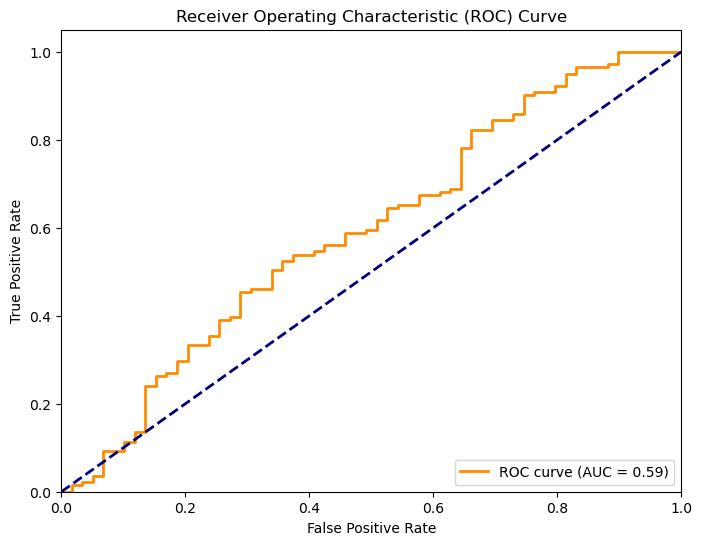

In [46]:
# ROC curve plot

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

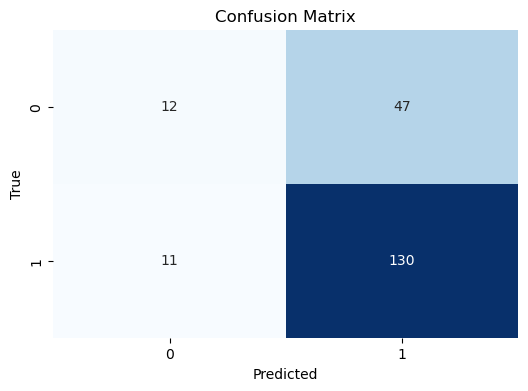

In [47]:
# Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [48]:
#  Classification Report

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.20      0.29        59
           1       0.73      0.92      0.82       141

    accuracy                           0.71       200
   macro avg       0.63      0.56      0.56       200
weighted avg       0.67      0.71      0.66       200



# Insights

#### Observations on the LogisticRegression Model:

##### - For class '0' (bad credit):
- Precision: 0.52
- Recall: 0.20
- F1-score: 0.29
- Support: 59 instances
    
##### - For class '1' (good credit):
- Precision: 0.73
- Recall: 0.92
- F1-score: 0.82
- Support: 141 instances


According to the dataset, the Logicstic regression model has more instances of 'good credit' (141 ) than 'bad credit' (59 ) which means that there are more cases of good credit.

Also the model has an overall accuracy score of 71%

# 2. Random Forest Classifier

In [49]:
# train the Random Forest classifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
# Make predictions

y_pred = rf_model.predict(X_test)

In [51]:
# Calculate ROC curve(Receiver Operating Characteristic Curve) and AUC (Area Under the ROC Curve)

fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

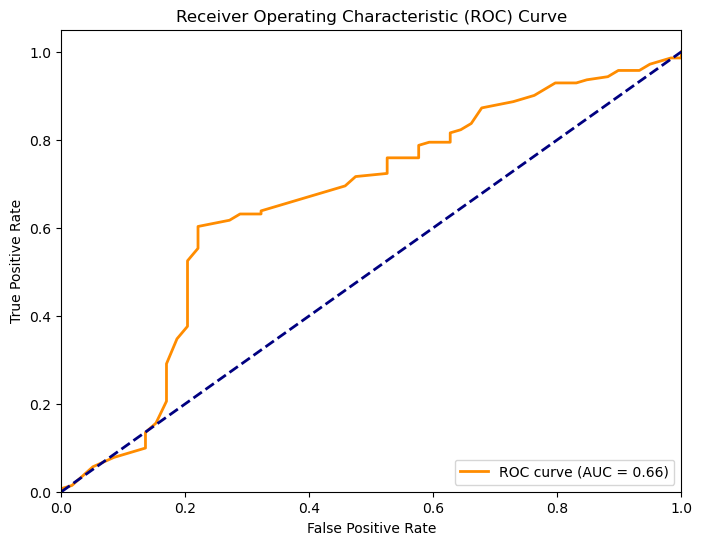

In [52]:
# ROC curve plot

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

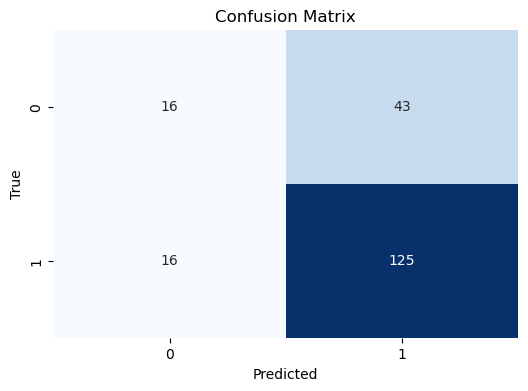

In [53]:
# Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [54]:
#  Classification Report

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.27      0.35        59
           1       0.74      0.89      0.81       141

    accuracy                           0.70       200
   macro avg       0.62      0.58      0.58       200
weighted avg       0.67      0.70      0.67       200



# Insights

#### Observations on the Random forest Classifier:

##### - For class '0' (bad credit):
- Precision: 0.50
- Recall: 0.27
- F1-score: 0.35
- Support: 59 instances

##### - For class '1' (good credit):
- Precision: 0.74
- Recall: 0.89
- F1-score: 0.81
- Support: 141 instances

The Random Forest Classifier also identifys more instances of 'good credit' (141 ) than 'bad credit' (59 ) which means that there are more cases of good credit, which is consistent with the Logistic Regression model's class distribution

Also the model has an overall accuracy score of 70%

# 3. Support Vector Machines (SVM) 

In [55]:
# identify the features_column_names( all other column names) & the target_column_names (the main column of concern)

features_column_names = [
    'Unnamed: 0', 'Age', 'Job', 'Credit amount', 'Duration',
    'Sex_male', 'Housing_own', 'Housing_rent',
    'Saving accounts_moderate', 'Saving accounts_quite rich', 'Saving accounts_rich',
    'Checking account_moderate', 'Checking account_rich',
    'Purpose_car', 'Purpose_domestic appliances', 'Purpose_education',
    'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs', 'Purpose_vacation/others'
]

target_column_name = 'Risk'  # target column

In [56]:
# Extract features(x) and target (y)

X = df_encoded[features_column_names]
y = df_encoded[target_column_name]

In [57]:
# Split the data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Create an SVM classifier with an RBF kernel

svm_classifier = SVC(kernel='rbf', C=1.0)

In [59]:
# Train the SVM model

svm_classifier.fit(X_train, y_train)

SVC()

In [60]:
# Make predictions

y_pred = svm_classifier.predict(X_test)

In [61]:
# Calculate the predicted 

y_prob = svm_classifier.decision_function(X_test)

In [62]:
# Calculate ROC curve(Receiver Operating Characteristic Curve) and AUC (Area Under the ROC Curve)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [71]:
# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

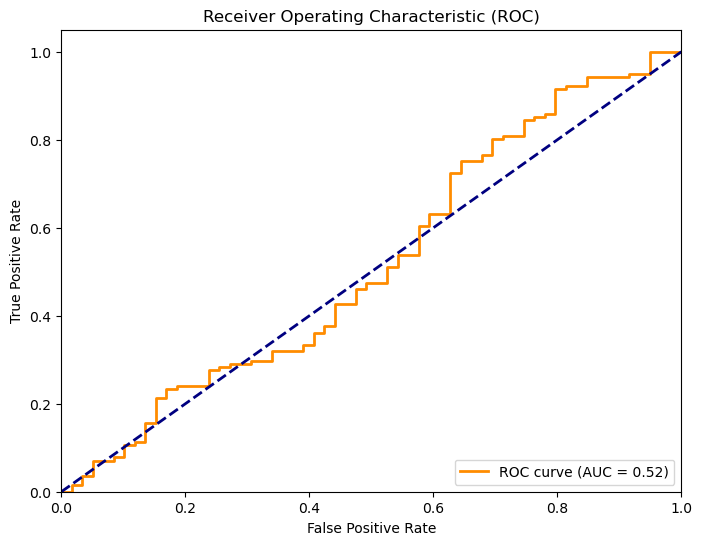

In [72]:
# Plot ROC curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


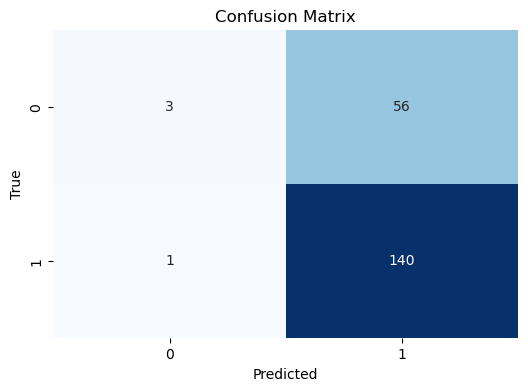

In [73]:
# Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [74]:

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.715
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.05      0.10        59
           1       0.71      0.99      0.83       141

    accuracy                           0.71       200
   macro avg       0.73      0.52      0.46       200
weighted avg       0.72      0.71      0.61       200



# Insights

#### Observations on theSupport Vector Machines (SVM)¶:

##### - For class '0' (bad credit):
- Precision: 0.75
- Recall: 0.05
- F1-score: 0.10
- Support: 59 instances

##### - For class '1' (good credit):
- Precision: 0.71
- Recall: 0.99
- F1-score: 0.83
- Support: 141 instances


The Support Vector Machines (SVM) classifier recognizes 141 instances of 'good credit,' surpassing the 59 instances of 'bad credit.' This suggests a predominance of good credit cases, aligning with the class distribution patterns observed in other models.

Additionally, the model achieves an overall accuracy rate of 71%.

# 4. KNeighborsClassifier (KNN)

In [75]:
# identify the features_column_names( all other column names) & the target_column_names (the main column of concern)

features_column_names = [
    'Unnamed: 0', 'Age', 'Job', 'Credit amount', 'Duration',
    'Sex_male', 'Housing_own', 'Housing_rent',
    'Saving accounts_moderate', 'Saving accounts_quite rich', 'Saving accounts_rich',
    'Checking account_moderate', 'Checking account_rich',
    'Purpose_car', 'Purpose_domestic appliances', 'Purpose_education',
    'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs', 'Purpose_vacation/others'
]

target_column_name = 'Risk'  #the target column

In [76]:
# Extract features(x) and target (y)

X = df_encoded[features_column_names]
y = df_encoded[target_column_name]

In [77]:
# Split the data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Train the KNeighborsClassifier

k = 5 
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [79]:
# Make predictions

y_pred = knn_classifier.predict(X_test)

In [80]:
y_prob = knn_classifier.predict_proba(X_test)[:, 1] # Get the predicted probabilities

In [81]:
# Compute ROC curve and AUC

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

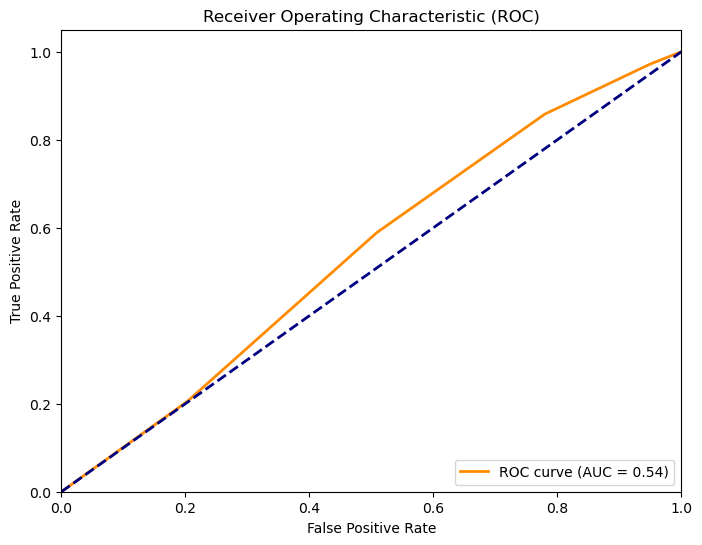

In [82]:
# Plot ROC curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

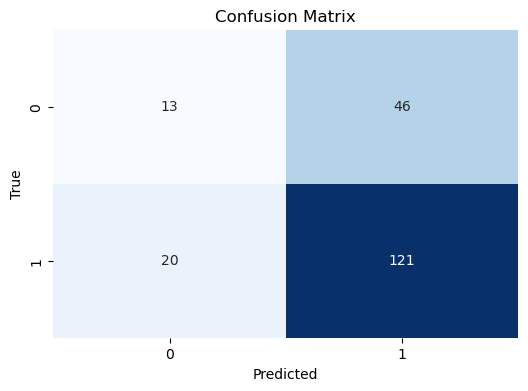

In [83]:
# Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [84]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.22      0.28        59
           1       0.72      0.86      0.79       141

    accuracy                           0.67       200
   macro avg       0.56      0.54      0.53       200
weighted avg       0.63      0.67      0.64       200



# Insights

#### Observations on the KNeighborsClassifier (KNN)¶:

##### - For class '0' (bad credit):
- Precision: 0.39
- Recall: 0.22
- F1-score: 0.28
- Support: 59 instances

##### - For class '1' (good credit):
- Precision: 0.72
- Recall: 0.86
- F1-score: 0.79
- Support: 141 instances

The KNeighborsClassifier (KNN) distinguishes 141 occurrences of 'good credit' compared to 59 instances of 'bad credit,' indicating a higher prevalence of good credit cases. This aligns with the class distribution patterns observed in other models.

Furthermore, the KNeighborsClassifier model attains an overall accuracy rate of 67%.

# My Observations!

### To enhance credit risk prediction, it is crucial to tackle data imbalance, carefully choose appropriate models, and establish continuous model monitoring practices. 

### It's worth noting that both the Logistic Regression model and Support Vector Machines (SVM) exhibited a commendable accuracy rate of 71%.